# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import re
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [24]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [25]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [26]:
# Combine the data into a single DataFrame
merged_study = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
merged_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [27]:
# Checking the number of mice.
len(merged_study["Mouse ID"].unique())

249

In [28]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupmouse = merged_study.loc[merged_study.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dupmouse

array(['g989'], dtype=object)

In [29]:
# Optional: Get all the data for the duplicate mouse ID. 


In [30]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study = merged_study[merged_study['Mouse ID'].isin(dupmouse)==False]
clean_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [31]:
# Checking the number of mice in the clean DataFrame.
clean_study["Mouse ID"].nunique()

248

## Summary Statistics

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drugstats = clean_study.groupby("Drug Regimen")
drugstats_mean = drugstats['Tumor Volume (mm3)'].mean()
drugstats_median = drugstats['Tumor Volume (mm3)'].median()
drugstats_var = drugstats['Tumor Volume (mm3)'].var()
drugstats_std = drugstats['Tumor Volume (mm3)'].std()
drugstats_sem = drugstats['Tumor Volume (mm3)'].sem()
fulldrugstats = pd.DataFrame({'Mean Tumor Volume': drugstats_mean, 
                              'Median Tumor Volume': drugstats_median,
                             'Tumor Volume Variance': drugstats_var,
                             'Tumor Volume Std Dev': drugstats_std,
                             'Tumor Volume Std Err': drugstats_sem})
fulldrugstats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [33]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
AggregatedMethod = drugstats['Tumor Volume (mm3)'].agg(["mean","median","var","std","sem"])
print( AggregatedMethod)

                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

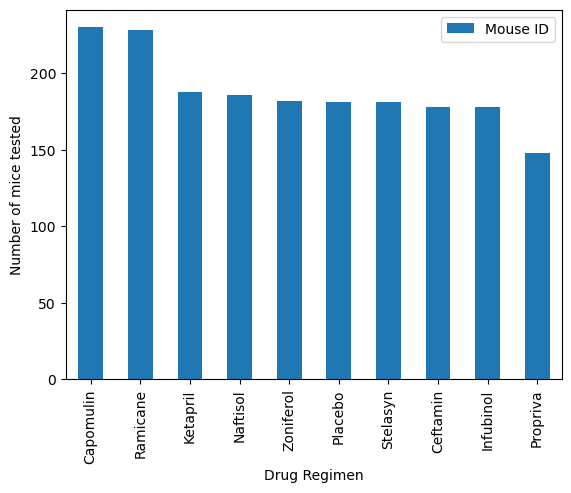

In [34]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
nmicetestedpy = clean_study.groupby("Drug Regimen").agg({"Mouse ID": "count"}).sort_values("Mouse ID", ascending=False)
nmicetesteddf = pd.DataFrame(nmicetestedpy)
nmicetestedbar = nmicetesteddf.plot.bar()
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice tested")
plt.show()

In [37]:
gendercount = clean_study.groupby("Sex")["Mouse ID"].count()
labels = gendercount.index
gendercount,labels

(Sex
 Female    922
 Male      958
 Name: Mouse ID, dtype: int64,
 Index(['Female', 'Male'], dtype='object', name='Sex'))

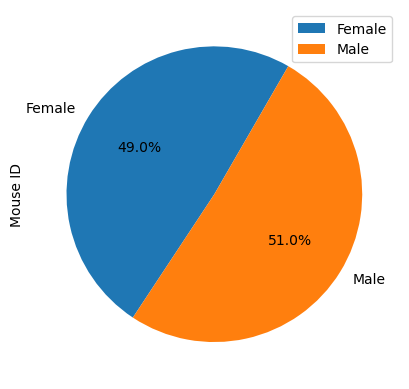

In [45]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

gendercount.plot(kind="pie",labels=gendercount.index,startangle = 60,autopct="%1.1f%%" )
#xaxis = gendercount.index
#plt.bar(xaxis, gendercount, align = "center")
#plt.xticks(rotation = 90)
#plt.xlabel("Drug Regimen")
#plt.ylabel("Number of mice tested")
plt.legend(labels)
plt.show()

# type(nmicetesteddf)

<function matplotlib.pyplot.show(close=None, block=None)>

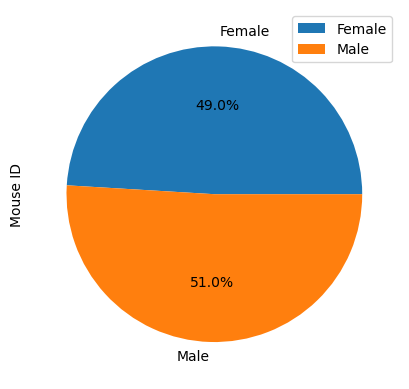

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
malefemale = clean_study.groupby("Sex").agg({"Mouse ID": "count"})
malefemale.plot(kind='pie', autopct="%1.1f%%", subplots=True)
plt.show

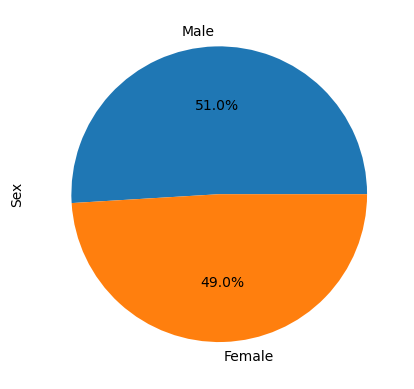

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
malefemale.plot.pie(subplots=True)
dist = malefemale["Mouse ID"]
sex = malefemale.index
plt.pie(dist, labels=sex, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
finaltvol = clean_study.groupby(["Mouse ID"])['Timepoint'].max().reset_index()
finaltvol

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mergeddata = finaltvol.merge(clean_study,on=['Mouse ID','Timepoint'],how="left")
mergeddata.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
5,a401,45,66.794156,4,Zoniferol,Female,8,25
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
8,a457,10,49.783419,0,Ketapril,Female,11,30
9,a492,45,60.122011,1,Stelasyn,Male,20,25


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
listofdrugs = ["Ceftamin", "Ramicane", "Infubinol", "Capomulin"]
tvollist = []
for drug in listofdrugs:
    finaltumorvol = mergeddata.loc[mergeddata["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    tvollist.append(finaltumorvol)
# tvollist

# Create empty list to fill with tumor vol data (for plotting)

#listofdrugs = ["Ceftamin", "Ramicane", "Infubinol", "Capomulin"]
#tvollist = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
# for series in tvollist:
    quartiles = finaltumorvol.quantile([0.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliners = finaltumorvol.loc[(finaltumorvol < lower_bound) | (finaltumorvol > upper_bound)]
    # print(series[(series < lower_bound) | (series > upper_bound)])
    print(f" {drug}'s potentional outliners:{outliners}")

 Ceftamin's potentional outliners:Series([], Name: Tumor Volume (mm3), dtype: float64)
 Ramicane's potentional outliners:Series([], Name: Tumor Volume (mm3), dtype: float64)
 Infubinol's potentional outliners:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
 Capomulin's potentional outliners:Series([], Name: Tumor Volume (mm3), dtype: float64)


C:\Users\elluka_cliftonblake\AppData\Local\Temp\ipykernel_294456\2921148133.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


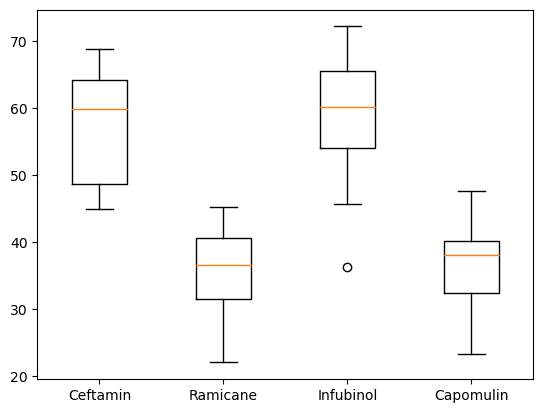

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.boxplot(tvollist)
ax1.set_xticklabels(listofdrugs)
fig1.show()

## Line and Scatter Plots

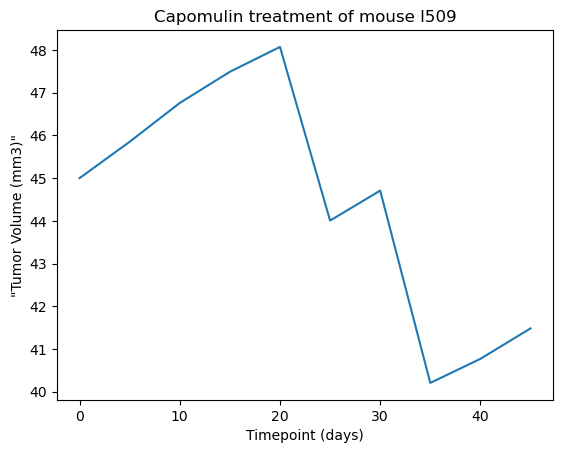

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capmouse = clean_study.loc[clean_study["Mouse ID"] == "l509"]
capmouse2 = capmouse[["Timepoint", "Tumor Volume (mm3)"]].set_index("Timepoint")
plt.plot(capmouse2)
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('"Tumor Volume (mm3)"')
plt.show()

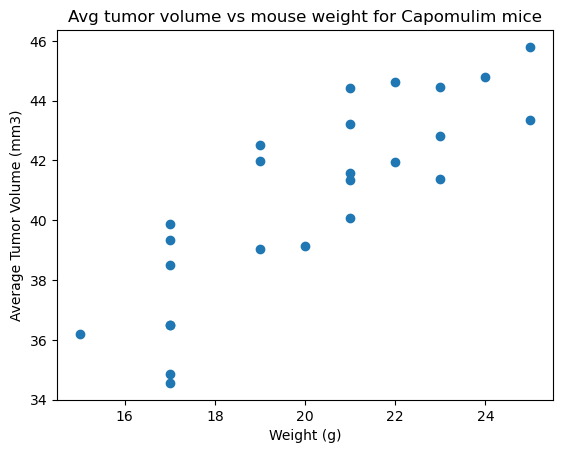

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capvolwei = clean_study.loc[clean_study["Drug Regimen"] == "Capomulin"].sort_values("Mouse ID")
capvolwei = capvolwei.groupby("Mouse ID").agg({"Tumor Volume (mm3)": "mean", "Weight (g)": "first"})

plt.scatter(capvolwei["Weight (g)"], capvolwei["Tumor Volume (mm3)"])
plt.title('Avg tumor volume vs mouse weight for Capomulim mice')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


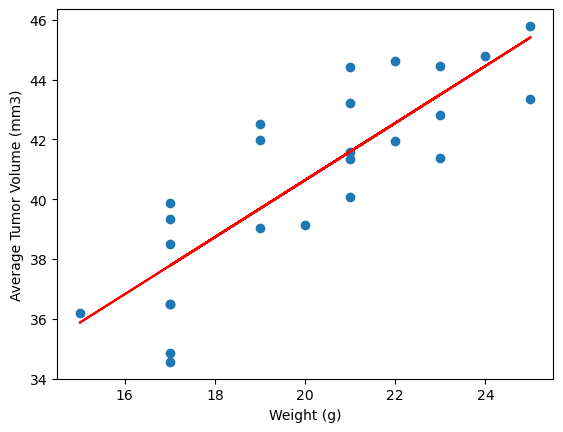

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
weight = capvolwei.iloc[:,1]
tumorvol = capvolwei.iloc[:,0]
correlation = st.pearsonr(weight,tumorvol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

In [ ]:
x_values = weight
y_values = tumorvol

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15, color="red")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.show()